In [2]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")

# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


한글 폰트 설정이 완료되었습니다.
데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 1: 고객별 RFM 점수를 계산하고, 고객을 'VIP', '우수고객', '일반고객', '이탈위험고객'으로 분류하세요.
# 시각화: 바 차트

# 비즈니스 목적: 고객을 가치에 따라 세분화하고, 그룹별로 맞춤형 마케팅을 진행하여 고객 관계를 강화합니다.

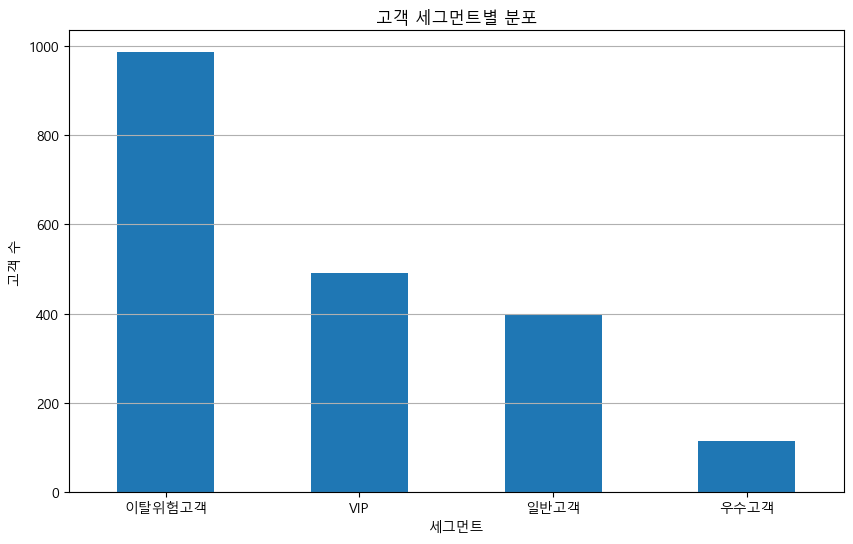

In [3]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 2: 고객의 생애 가치(LTV)를 간단하게 계산하여 상위 10명의 고객을 찾으세요.
# 비즈니스 목적: 장기적으로 회사에 가장 큰 가치를 제공하는 핵심 고객을 식별하고, 이들에게 차별화된 혜택을 제공하여 관계를 유지합니다.

총 누적 구매액 기준 상위 10명 고객 (LTV):
customer_id
C0625    2894100
C1698    2761800
C1147    2756300
C1448    2463200
C1935    2422100
C0409    2245800
C1945    2227800
C0338    2221300
C1990    2207500
C0007    2200800
Name: total_sales, dtype: int64


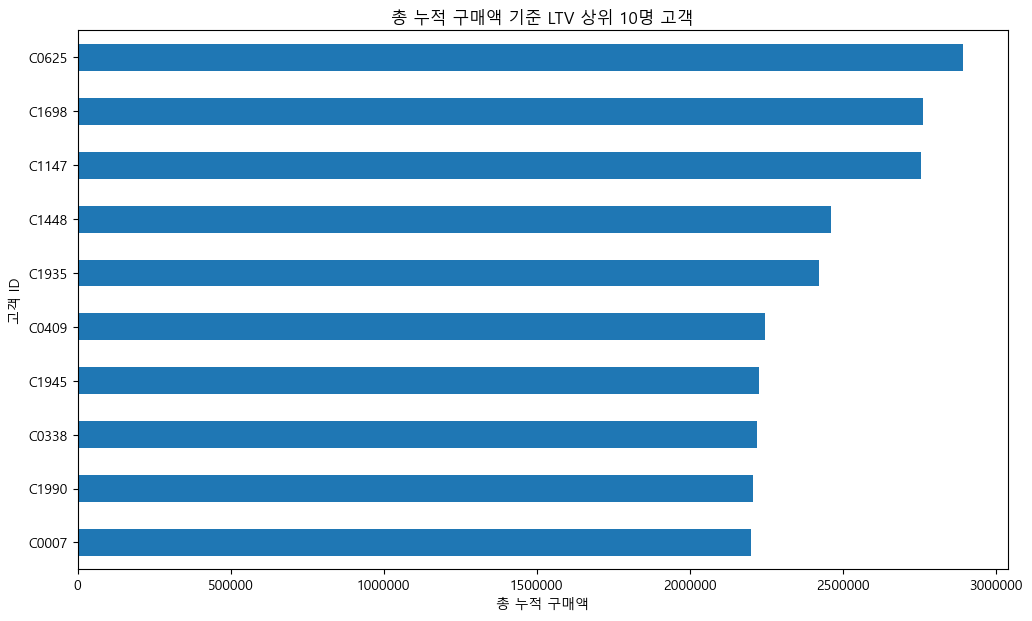

In [5]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 3: 이탈 고객(가정: 마지막 구매 후 180일 이상 경과)의 이탈 직전 30일간 구매 패턴을 분석하세요.
# - 분석 기준일을 마지막 주문일 다음 날로 설정
# 비즈니스 목적: 고객이 이탈하기 전에 보이는 공통적인 행동 패턴을 파악하여, 유사한 패턴을 보이는 고객에게 선제적으로 이탈 방지 캠페인을 진행합니다.

In [6]:
# 출력 결과를 보고 코딩하세요







이탈 고객의 이탈 직전 30일 구매 패턴:
             avg_sales top_category
customer_id                        
C0001          23800.0        스포츠용품
C0006          68000.0           도서
C0009         194400.0           식품
C0013         121600.0        스포츠용품
C0014          94200.0           식품


C:\Users\USER\AppData\Local\Temp\ipykernel_36168\2658047372.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_pattern = churn_customer_data.groupby('customer_id').apply(analyze_before_churn).dropna()


In [ ]:
# 문제 4: 연령대를 10세 단위로 나누고, 각 연령대별로 가장 선호하는 상품 카테고리를 찾으세요.
# 시각화: 누적 바 차트

# 비즈니스 목적: 연령대별로 선호하는 상품군이 다르다는 가설을 검증하고, 연령 타겟 마케팅 및 상품 소싱 전략에 활용합니다.

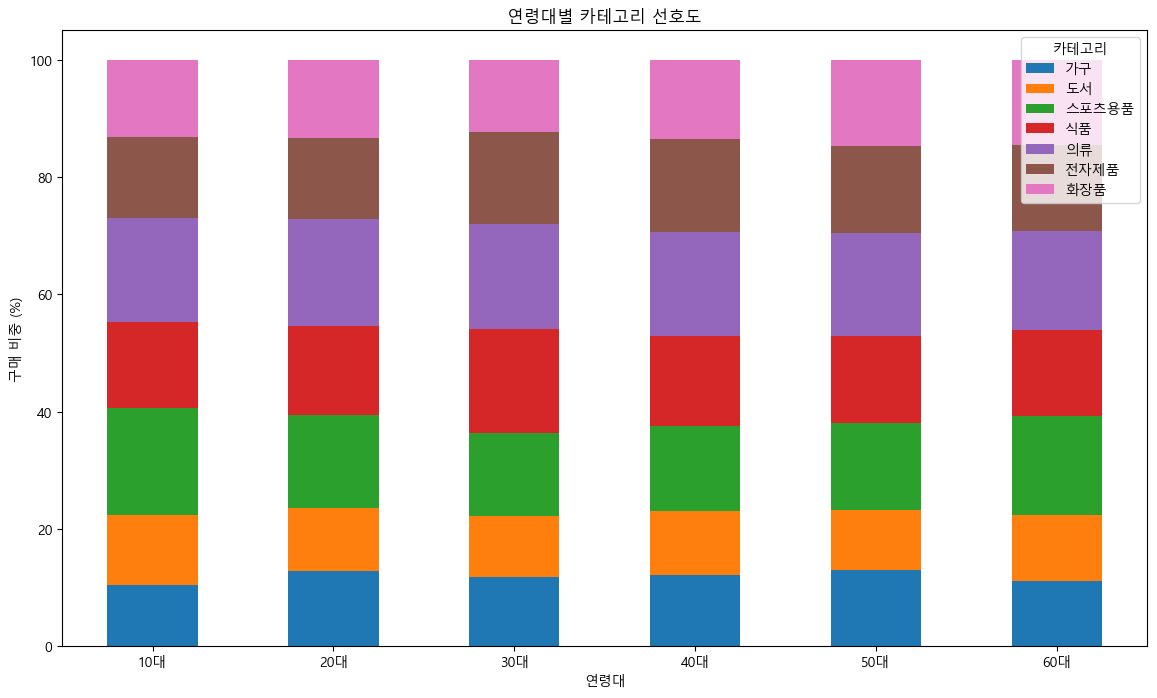

연령대별 최고 선호 카테고리:
age_group
10대    스포츠용품
20대       의류
30대       의류
40대       의류
50대       의류
60대       의류
dtype: object


In [7]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 5: 고객의 첫 구매부터 현재까지의 누적 구매액 변화를 고객별로 계산하세요.
# 비즈니스 목적: 고객의 성장 과정을 파악하고, VIP 고객의 성장 패턴을 이해하여 잠재적 VIP 고객을 조기에 발굴하는 데 활용합니다.

In [8]:
# 출력 결과를 보고 코딩하세요







고객별 누적 구매액 변화 (상위 5개 고객 샘플):
     customer_id          order_date  total_sales  cumulative_sales
1022       C0001 2024-01-03 15:03:51       290700            290700
3154       C0001 2024-06-07 00:42:31       407500            698200
3415       C0001 2024-06-24 23:09:17        28000            726200
3438       C0001 2024-06-26 07:54:05       195900            922100
6450       C0001 2025-02-05 12:35:35        51200            973300
7041       C0001 2025-03-20 12:44:59        18500            991800
7406       C0001 2025-04-15 05:26:10        29100           1020900
7357       C0002 2025-04-11 22:46:32       314000            314000
8605       C0002 2025-07-10 02:16:30       141400            455400
9703       C0002 2025-09-29 09:52:51       393200            848600
1913       C0003 2024-03-09 12:46:59       199800            199800
9461       C0003 2025-09-10 15:26:40       401000            600800
6640       C0004 2025-02-18 08:09:24        44000             44000
9444       C0004 20

In [ ]:
# 문제 6: 성별과 연령대를 조합하여 (예: '20대 남성'), 각 그룹의 평균 주문액(AOV)을 비교하세요.
# 시각화: 히트맵

# 비즈니스 목적: 보다 세분화된 고객 그룹(세그먼트)의 특징을 분석하고, 특정 그룹에 대한 타겟 마케팅 전략의 효과를 극대화합니다.

C:\Users\USER\AppData\Local\Temp\ipykernel_36168\636619968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aov_by_segment = df.groupby(['order_id', 'gender', 'age_group'])['total_sales'].sum().reset_index()


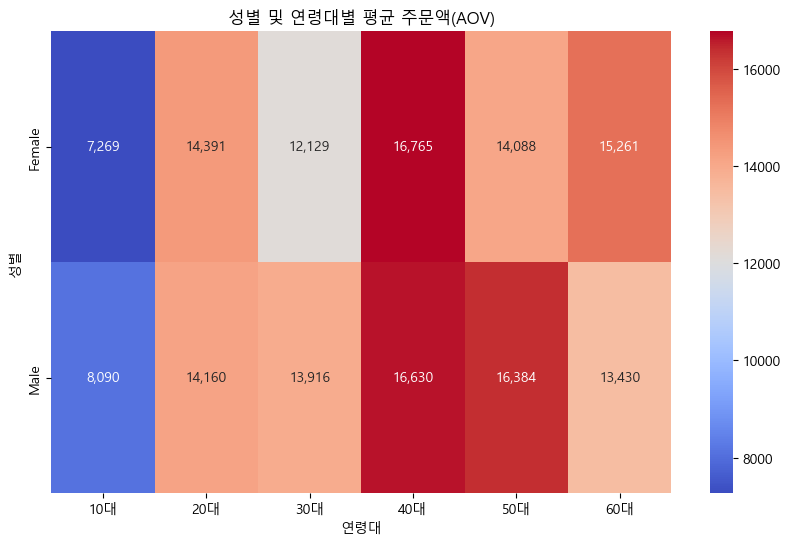

In [9]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 7: 고객의 가입 후 첫 구매까지 걸리는 평균 시간을 계산하세요.
# 비즈니스 목적: 고객 활성화까지의 기간(Lead Time)을 측정하여, 신규 가입 고객을 위한 온보딩 프로세스(가입 환영 쿠폰, 사용 가이드 등)의 효과를 평가합니다.

In [10]:
# 출력 결과를 보고 코딩하세요







가입 후 첫 구매까지의 평균 시간: -42 days +06:19:37.922110553


In [ ]:
# 문제 8: 고객이 주로 활동하는 상위 15개 도시를 파악하고, 도시별 고객 수와 총매출액을 비교하세요.
# 시각화: 바 차트 (이중 축)

# 비즈니스 목적: 지역 기반 마케팅 전략을 수립하고, 특정 도시에 오프라인 매장을 열거나 지역 광고를 집행할 때의 의사결정 근거로 활용합니다.

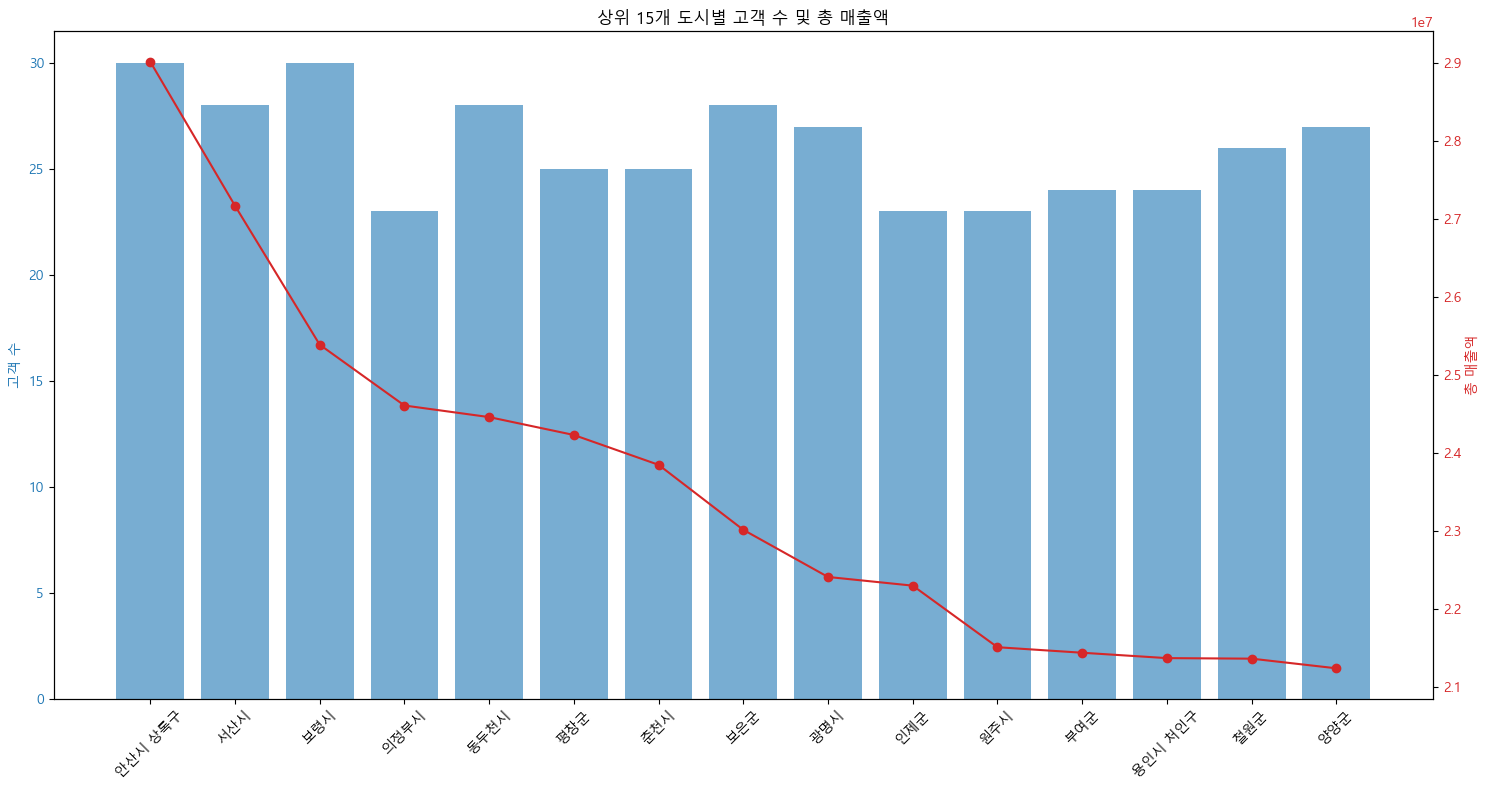

In [11]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 9: 전체 고객 중 상위 20%의 고객이 전체 매출의 몇 %를 차지하는지(파레토 법칙) 분석하세요.
# 비즈니스 목적: 핵심 고객(VIP)의 중요도를 정량적으로 파악하고, 이들 소수 고객에게 마케팅 리소스를 집중하는 전략(VIP 마케팅)의 타당성을 검증합니다.

In [12]:
# 출력 결과를 보고 코딩하세요







상위 398명(1990명의 20%)의 고객이 전체 매출의 36.36%를 차지합니다.


In [13]:
# 문제 10: 고객별 구매 카테고리 다양성(구매한 고유 카테고리 수)을 분석하세요.
# 비즈니스 목적: 고객의 쇼핑 스타일을 파악하고, 다양한 카테고리를 구매하는 고객에게는 신규 카테고리 상품을, 
# 특정 카테고리만 구매하는 고객에게는 해당 카테고리의 심화 상품을 추천하는 등 개인화 마케팅에 활용합니다.

고객별 구매 카테고리 다양성 (상위 10명):
customer_id
C0051    7
C1510    7
C0616    7
C0617    7
C0625    7
C1859    7
C0779    7
C0412    7
C0863    7
C0253    7
Name: category, dtype: int64


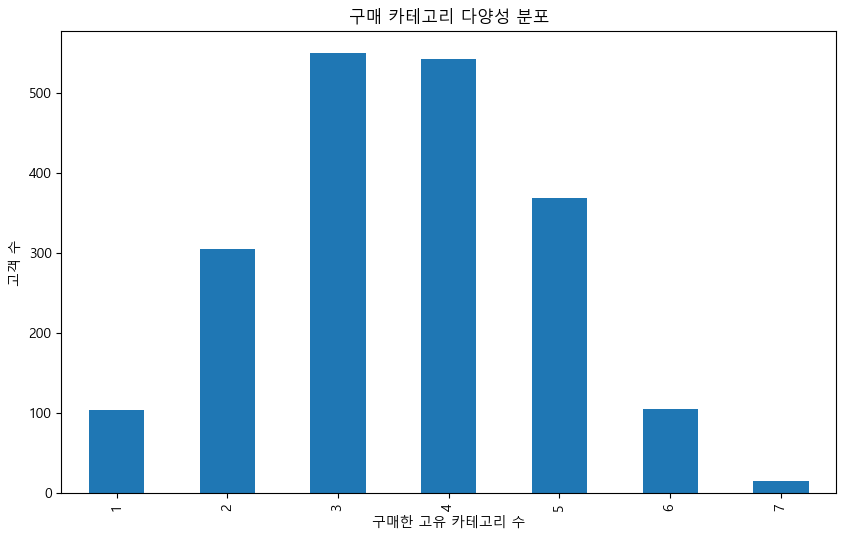

In [14]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 11: 고객의 구매 시간 패턴을 분석하여 '주중 구매형', '주말 구매형', '균등 구매형'으로 분류하세요.
# 비즈니스 목적: 고객의 라이프스타일을 추정하고, '주말에 쇼핑하는 고객'에게는 금요일 저녁에 주말 쿠폰을 보내는 등 요일 타겟 프로모션의 효과를 높입니다.

고객별 구매 시간 패턴 유형:
day_type      주말   주중 shopper_type
customer_id                       
C0001        0.0  1.0       주중 구매형
C0002        0.0  1.0       주중 구매형
C0003        0.5  0.5       균등 구매형
C0004        0.0  1.0       주중 구매형
C0005        0.0  1.0       주중 구매형


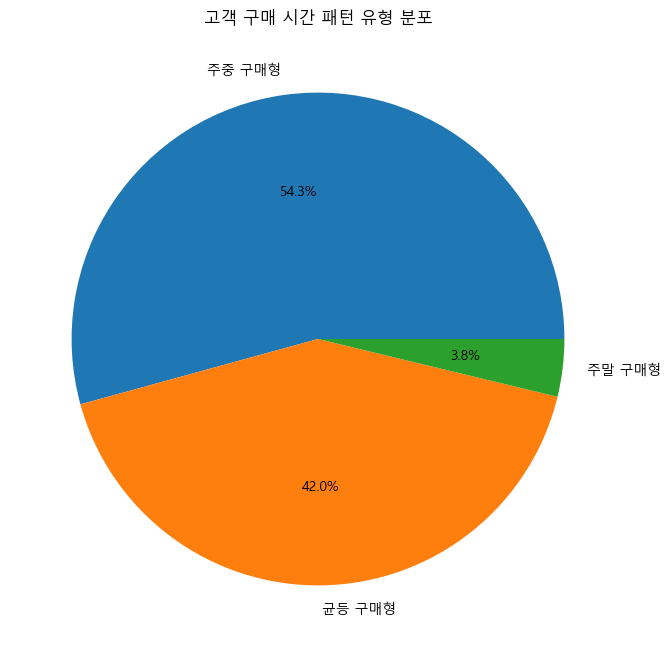

In [17]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 13: 특정 이벤트 기간 동안의 고객 구매액이 평소 대비 얼마나 증가했는지 고객별로 비교하세요.
# - 가상의 이벤트 기간 설정 (데이터의 마지막 한 달로 가정)
# 비즈니스 목적: 마케팅 캠페인의 효과를 측정하고, 어떤 고객이 이벤트에 가장 잘 반응했는지 파악하여 향후 캠페인 타겟팅에 활용합니다.

In [18]:
# 출력 결과를 보고 코딩하세요







이벤트 기간 구매액 증감률 상위 10명 고객:
             normal_avg_monthly  event_sales  increase_pct
customer_id                                               
C1771                550.000000      90900.0  16427.272727
C0671               4450.000000     258500.0   5708.988764
C1014               5016.666667     283000.0   5541.196013
C0919              15562.500000     818500.0   5159.437751
C0820               4004.166667     196500.0   4807.388137
C1493               7512.500000     362300.0   4722.628952
C1992               8358.333333     391500.0   4583.948156
C1955               9620.833333     386500.0   3917.323517
C0178               5262.500000     193800.0   3582.660333
C0424               2433.333333      87600.0   3500.000000
